In [330]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score,r2_score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_absolute_percentage_error as mape

# This is to supress the warning messages
import warnings
warnings.filterwarnings('ignore')

In [331]:
food_df = pd.read_csv(r'C:\Users\Owner\Downloads\DataScience_Project\onlinedeliverydata.csv')
print("Total Records: ",len(food_df))

Total Records:  388


In [332]:
food_df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [333]:
#Checking for duplicates
duplicate = food_df[food_df.duplicated()]
print("Total number of duplicated: ",len(duplicate))

Total number of duplicated:  102


In [334]:
food_df = food_df.drop_duplicates()
print("Total number of records after dropping duplicates: ",len(food_df))

Total number of records after dropping duplicates:  286


In [335]:
#Checking total null values
food_df.isnull().sum().sum()

0

In [336]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 369
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        286 non-null    int64  
 1   Gender                                     286 non-null    object 
 2   Marital Status                             286 non-null    object 
 3   Occupation                                 286 non-null    object 
 4   Monthly Income                             286 non-null    object 
 5   Educational Qualifications                 286 non-null    object 
 6   Family size                                286 non-null    int64  
 7   latitude                                   286 non-null    float64
 8   longitude                                  286 non-null    float64
 9   Pin code                                   286 non-null    int64  
 10  Medium (P1)               

In [337]:
#Understanding the columns
food_df.dtypes.value_counts()

object     50
int64       3
float64     2
dtype: int64

In [338]:
#Standardizing Column Names
food_df.columns = food_df.columns.str.replace(' ','_')
print(food_df.columns)

Index(['Age', 'Gender', 'Marital_Status', 'Occupation', 'Monthly_Income',
       'Educational_Qualifications', 'Family_size', 'latitude', 'longitude',
       'Pin_code', 'Medium_(P1)', 'Medium_(P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease_and_convenient',
       'Time_saving', 'More_restaurant_choices', 'Easy_Payment_option',
       'More_Offers_and_Discount', 'Good_Food_quality', 'Good_Tracking_system',
       'Self_Cooking', 'Health_Concern', 'Late_Delivery', 'Poor_Hygiene',
       'Bad_past_experience', 'Unavailability', 'Unaffordable',
       'Long_delivery_time', 'Delay_of_delivery_person_getting_assigned',
       'Delay_of_delivery_person_picking_up_food', 'Wrong_order_delivered',
       'Missing_item', 'Order_placed_by_mistake', 'Influence_of_time',
       'Order_Time', 'Maximum_wait_time', 'Residence_in_busy_location',
       'Google_Maps_Accuracy', 'Good_Road_Condition', 'Low_quantity_low_time',
       'Delivery_person_ability', 'Influence_of_

In [339]:
num_df = food_df.select_dtypes(exclude = 'object').copy()
num_df.head()

,Age,Family_size,latitude,longitude,Pin_code
0,20,4,12.9766,77.5993,560001
1,24,3,12.9770,77.5773,560009
2,22,3,12.9551,77.6593,560017
3,22,6,12.9473,77.5616,560019
4,22,4,12.9850,77.5533,560010


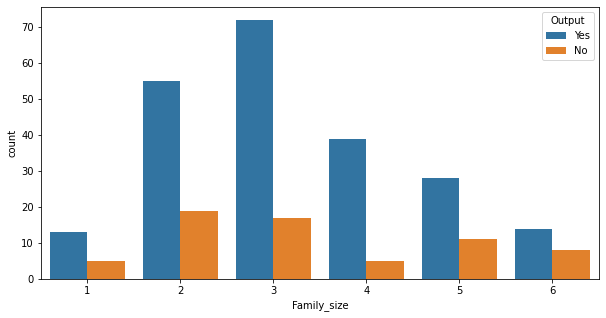

In [340]:
fig = plt.figure(figsize=(10,5))

sns.countplot(data = food_df, x = 'Family_size',hue='Output')
plt.show()

In [341]:
cat_df = food_df.select_dtypes(include = 'object').copy()
cat_df.head()

,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Medium_(P1),Medium_(P2),Meal(P1),Meal(P2),Perference(P1),...,Less_Delivery_time,High_Quality_of_package,Number_of_calls,Politeness,Freshness_,Temperature,Good_Taste_,Good_Quantity,Output,Reviews
0,Female,Single,Student,No Income,Post Graduate,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,Female,Single,Student,Below Rs.10000,Graduate,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,Male,Single,Student,Below Rs.10000,Post Graduate,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,Female,Single,Student,No Income,Graduate,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,Male,Single,Student,Below Rs.10000,Post Graduate,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


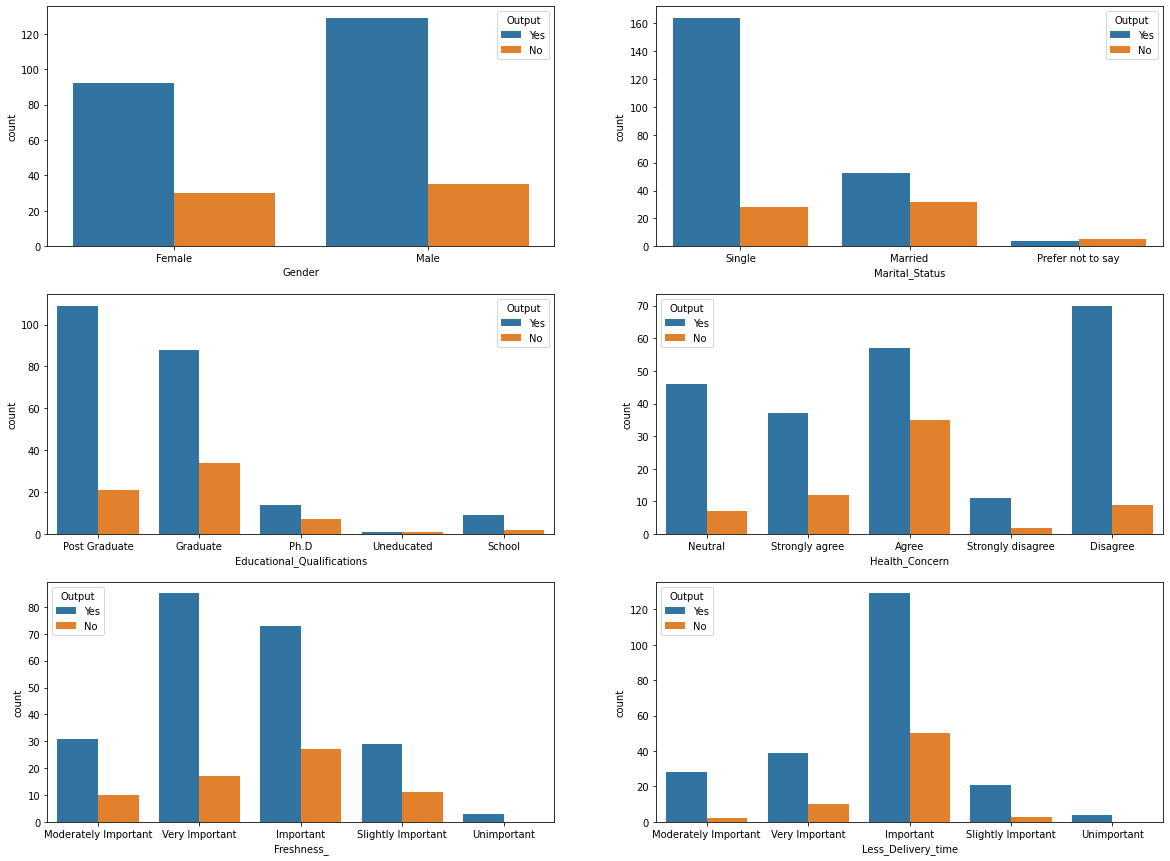

In [342]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(3,2,1) 
sns.countplot(data = food_df, x = 'Gender', ax = ax1,hue='Output')


ax1 = fig.add_subplot(3,2,2) 
sns.countplot(data = food_df, x = 'Marital_Status', ax = ax1,hue='Output')


ax1 = fig.add_subplot(3,2,3) 
sns.countplot(data = food_df, x = 'Educational_Qualifications', ax = ax1,hue='Output')

ax1 = fig.add_subplot(3,2,4) 
sns.countplot(data = food_df, x = 'Health_Concern', ax = ax1,hue='Output')

ax1 = fig.add_subplot(3,2,5) 
sns.countplot(data = food_df, x = 'Freshness_', ax = ax1,hue='Output')

ax1 = fig.add_subplot(3,2,6) 
sns.countplot(data = food_df, x = 'Less_Delivery_time', ax = ax1,hue='Output')
plt.show()


In [343]:
x = food_df.groupby(['latitude', 'longitude', 'Pin_code']).size().reset_index()
x.columns = ['latitude', 'longitude', 'pincode', 'frequency']
x.sort_values(by=['frequency'], ascending=False, inplace=True)

latitude = 12.972442
longitude = 77.580643
delivery_map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lon, freq, pin in zip(x['latitude'], x['longitude'], x['frequency'], x['pincode']):
    folium.CircleMarker([lat, lon], radius=freq*1.5, 
                        popup = ('Pincode: <b>'+ str(pin)+'</b> <br>' 
                                 'No. of customers: <b>'+ str(freq)+'</b>'), 
                        tooltip='Click to expand',
                        color='b', 
                        fill_color='#FF5F15', 
                        fill=True, 
                        fill_opacity=0.8).add_to(delivery_map)
delivery_map

In [344]:
#Understanding if it is an Imbalanced DataSet

customer_churn = food_df[food_df['Output']=='Yes']
customer_not_churn = food_df[food_df['Output']=='No']

print("Churned: ",customer_churn.shape,"and Not Churned: ",customer_not_churn.shape)

Churned:  (221, 55) and Not Churned:  (65, 55)


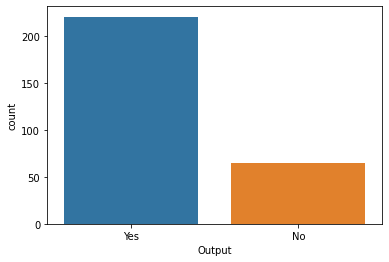

In [345]:
sns.countplot(data = food_df, x = 'Output')
plt.show()

In [346]:
#Mapping 1 and 0 to Yes and No respectively for further analysis.
food_df['mapped_output'] = food_df['Output'].map({'Yes': 1, 'No': 0})
food_df.head()

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,latitude,longitude,Pin_code,...,High_Quality_of_package,Number_of_calls,Politeness,Freshness_,Temperature,Good_Taste_,Good_Quantity,Output,Reviews,mapped_output
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n,1
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil,1
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so...",1
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil,1
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL,1


In [347]:
#Calculating Weight of Evidence and Information Value for Feature Selection
def get_IV(df, feature, target):
    lst = []
    
    unique_values = df[feature].unique()
    for val in unique_values:
        lst.append([feature,                                                        # Feature name
                    val,                                                            # Value of a feature (unique)
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]   # Bad  (Fraud == 1)
                   ])
 
    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'Good', 'Bad'])

        
    total_bad = df[df[target] == 1].count()[feature]
    total_good = df.shape[0] - total_bad
    
    data['Distribution Good'] = data['Good']/ total_good
    data['Distribution Bad'] = data['Bad'] / total_bad
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    iv = data['IV'].sum()
    WoE = data['WoE'].sum()

    return iv, data

In [348]:
food_df_copy = food_df.copy()
final_iv_values = {}

for i in cat_df:
    IV, Data = get_IV(food_df,i,'mapped_output')
    final_iv_values[i] = IV
    for j in range(len(Data)):
        food_df_copy[i] = food_df_copy[i].replace([Data['Value'][j]], Data['WoE'][j])
    
food_df_copy.head() 

,Age,Gender,Marital_Status,Occupation,Monthly_Income,Educational_Qualifications,Family_size,latitude,longitude,Pin_code,...,High_Quality_of_package,Number_of_calls,Politeness,Freshness_,Temperature,Good_Taste_,Good_Quantity,Output,Reviews,mapped_output
0,20,0.103184,-0.543886,-0.810546,-0.648027,-0.423050,4,12.9766,77.5993,560001,...,0.045120,-1.009817,-0.595383,0.092373,0.019803,-0.385662,-0.855666,0.0,0.000000,1
1,24,0.103184,-0.543886,-0.810546,-0.028988,0.272799,3,12.9770,77.5773,560009,...,-0.067209,0.631724,0.461635,-0.385662,0.252997,-0.152857,0.071096,0.0,-1.579585,1
2,22,-0.080689,-0.543886,-0.810546,-0.028988,-0.423050,3,12.9551,77.6593,560017,...,-0.067209,-1.009817,0.461635,-0.385662,-0.220339,-0.152857,-0.855666,0.0,0.000000,1
3,22,0.103184,-0.543886,-0.810546,-0.648027,0.272799,6,12.9473,77.5616,560019,...,0.230524,-1.009817,0.461635,-0.385662,0.252997,-0.152857,0.065265,0.0,0.125163,1
4,22,-0.080689,-0.543886,-0.810546,-0.028988,-0.423050,4,12.9850,77.5533,560010,...,0.230524,-1.009817,0.091262,0.229153,-0.220339,-0.152857,0.071096,0.0,-1.702964,1


In [349]:
#Storing features and their IV values respectively
final_iv_values = {}
for i in food_df.columns:
    IV, Data = get_IV(food_df,i,'mapped_output')
    final_iv_values[i] = IV
    
#Sorting the the features in descending order of their IV values.
features = {}
for w in sorted(final_iv_values, key=final_iv_values.get, reverse=True):
    features[w] = final_iv_values[w]

    
#Selecting top 20 features for further analyses. 
newDict = dict()
i = 0 #Max Features
# Iterate over all the items in dictionary and filter items which has even keys
for (key, value) in features.items():
   # Check if key is even then add pair to new dictionary
    if value > 0.02 and value < 0.5 and i<20:
            newDict[key] = value
            i= i + 1
newDict

{'Occupation': 0.46849201214472613,
 'Bad_past_experience': 0.447968022390487,
 'Marital_Status': 0.43602615701969183,
 'Health_Concern': 0.4310416211668638,
 'Unavailability': 0.4206323493525488,
 'Number_of_calls': 0.34612520714367473,
 'Monthly_Income': 0.31109959086914973,
 'Politeness': 0.2776151479355692,
 'Delay_of_delivery_person_picking_up_food': 0.24407301837422027,
 'Residence_in_busy_location': 0.23659187749732588,
 'Less_Delivery_time': 0.22535956621508033,
 'Poor_Hygiene': 0.19592179760175166,
 'Wrong_order_delivered': 0.19470275384471983,
 'Delay_of_delivery_person_getting_assigned': 0.17458595892752807,
 'Family_size': 0.1605994848656031,
 'Perference(P2)': 0.14689395017535709,
 'Educational_Qualifications': 0.1456552896680679,
 'High_Quality_of_package': 0.13395477591113297,
 'Good_Taste_': 0.0947255352598874,
 'Long_delivery_time': 0.09123685069896405}

In [350]:
#Creating the list of names of top 20 features 
feature_list = []
for i in newDict:
    feature_list.append(i)
print(feature_list)

['Occupation', 'Bad_past_experience', 'Marital_Status', 'Health_Concern', 'Unavailability', 'Number_of_calls', 'Monthly_Income', 'Politeness', 'Delay_of_delivery_person_picking_up_food', 'Residence_in_busy_location', 'Less_Delivery_time', 'Poor_Hygiene', 'Wrong_order_delivered', 'Delay_of_delivery_person_getting_assigned', 'Family_size', 'Perference(P2)', 'Educational_Qualifications', 'High_Quality_of_package', 'Good_Taste_', 'Long_delivery_time']


In [351]:
if 'mapped_output' not in feature_list:
    feature_list.append('mapped_output')

dataframe = food_df_copy[feature_list]
dataframe.head()

,Occupation,Bad_past_experience,Marital_Status,Health_Concern,Unavailability,Number_of_calls,Monthly_Income,Politeness,Delay_of_delivery_person_picking_up_food,Residence_in_busy_location,...,Poor_Hygiene,Wrong_order_delivered,Delay_of_delivery_person_getting_assigned,Family_size,Perference(P2),Educational_Qualifications,High_Quality_of_package,Good_Taste_,Long_delivery_time,mapped_output
0,-0.810546,-0.722135,-0.543886,-0.658956,-0.385662,-1.009817,-0.648027,-0.595383,0.460011,0.111370,...,0.000000,0.382992,0.035932,4,-0.973449,-0.423050,0.045120,-0.385662,0.010753,1
1,-0.810546,0.336472,-0.543886,0.097764,0.753772,0.631724,-0.028988,0.461635,-0.264302,-1.771957,...,0.450586,-0.097980,0.125163,3,-0.105361,0.272799,-0.067209,-0.152857,-0.462624,1
2,-0.810546,0.887303,-0.543886,-0.658956,0.307485,-1.009817,-0.028988,0.461635,0.460011,0.111370,...,0.394496,-0.097980,0.035932,3,-0.257829,-0.423050,-0.067209,-0.152857,0.010753,1
3,-0.810546,-0.340200,-0.543886,0.097764,0.165985,-1.009817,-0.648027,0.461635,0.460011,0.530628,...,0.394496,0.005618,0.035932,6,-0.973449,0.272799,0.230524,-0.152857,0.010753,1
4,-0.810546,0.336472,-0.543886,0.097764,0.307485,-1.009817,-0.028988,0.091262,-0.405465,0.111370,...,0.394496,-1.127600,0.125163,4,-0.105361,-0.423050,0.230524,-0.152857,-0.462624,1


### Model

### Logistic Regression

In [352]:
#Adding Output Column in x and then removing for Train(X) and y='Output'

X = dataframe.drop('mapped_output', axis=1) # input categorical features
y = dataframe['mapped_output'] # target variable

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

log_model = LogisticRegression(max_iter=250)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

print(classification_report(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.83      0.36      0.50        28
           1       0.76      0.97      0.85        58

    accuracy                           0.77        86
   macro avg       0.80      0.66      0.67        86
weighted avg       0.78      0.77      0.74        86

[[10 18]
 [ 2 56]]


In [354]:
top_3_features = feature_list[:3]
testSize = [0.2,0.33,0.5]
for i in top_3_features:
    for j in testSize:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=j,stratify=X[i], random_state=100)
        log_model = LogisticRegression(max_iter=250)
        log_model.fit(X_train, y_train)

        log_pred = log_model.predict(X_test)
        
        print("Feature :",i)
        print(classification_report(y_test, log_pred))
        print(confusion_matrix(y_test, log_pred))

Feature : Occupation
              precision    recall  f1-score   support

           0       0.58      0.54      0.56        13
           1       0.87      0.89      0.88        45

    accuracy                           0.81        58
   macro avg       0.73      0.71      0.72        58
weighted avg       0.81      0.81      0.81        58

[[ 7  6]
 [ 5 40]]
Feature : Occupation
              precision    recall  f1-score   support

           0       0.61      0.61      0.61        18
           1       0.91      0.91      0.91        77

    accuracy                           0.85        95
   macro avg       0.76      0.76      0.76        95
weighted avg       0.85      0.85      0.85        95

[[11  7]
 [ 7 70]]
Feature : Occupation
              precision    recall  f1-score   support

           0       0.75      0.45      0.57        33
           1       0.85      0.95      0.90       110

    accuracy                           0.84       143
   macro avg       0.80    

In [374]:
#Adding Output Column in x and then removing for Train(X) and y='Output'

X = food_df_copy.drop('mapped_output', axis=1) # input categorical features
y = food_df_copy['mapped_output'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.896551724137931
